In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [2]:
df = pd.read_csv('gfp_folding.csv')
df

,t_ref,V_ref,t_unf,V_unf
0,-312.500000,0.021321,-78.125000,0.616515
1,-312.421875,0.118316,-78.105469,1.166263
2,-312.343750,0.123742,-78.085938,1.166602
3,-312.265625,0.121368,-78.066406,1.164228
4,-312.187500,0.118655,-78.046875,1.165585
...,...,...,...,...
7262,254.843750,0.558182,NaN,NaN
7263,254.921875,0.559200,NaN,NaN
7264,255.000000,0.560217,NaN,NaN
7265,255.078125,0.559539,NaN,NaN


-60.99609375 0.111193834


<Figure size 432x288 with 0 Axes>

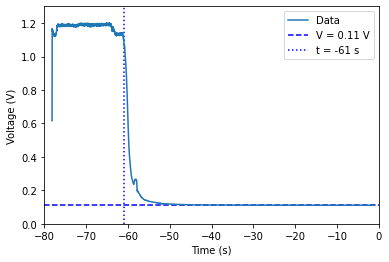

In [3]:
plt.figure()
df.plot('t_unf', 'V_unf', label='Data')
plt.xlim(-80,0)
plt.ylim(0,1.3)
plt.xlabel(r'Time (s)')
plt.ylabel(r'Voltage (V)')

T_min_0 = -61
df_unf = df.query('-61 < t_unf')
dT = df_unf.iloc[0]['t_unf']
dV = df_unf.iloc[-1]['V_unf']
print(dT, dV)

plt.hlines(dV, -80, 0, linestyle='dashed', color='b', label=r'V = 0.11 V')
plt.vlines(T_min_0, 0, 1.3, linestyle='dotted', color='b', label=r't = -61 s')
plt.legend()
plt.show()

-60.99609375 0.111193834


C:\Users\shun-\AppData\Local\Temp/ipykernel_1144/207892340.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unf['Time'] = df_unf['t_unf'] - dT
C:\Users\shun-\AppData\Local\Temp/ipykernel_1144/207892340.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unf['Voltage'] = df_unf['V_unf'] - dV


<Figure size 432x288 with 0 Axes>

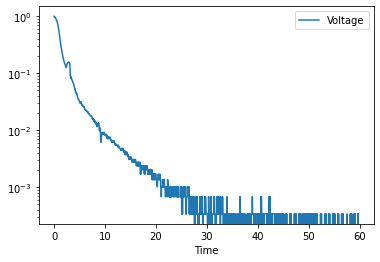

In [4]:
#立ち下がり以降のデータすべてを使う

T_min_0 = -61
df_unf = df.query('-61 < t_unf')
dT = df_unf.iloc[0]['t_unf']
dV = df_unf.iloc[-1]['V_unf']
print(dT, dV)

df_unf['Time'] = df_unf['t_unf'] - dT
df_unf['Voltage'] = df_unf['V_unf'] - dV
#print(df_unf)
plt.figure()
df_unf.plot('Time', 'Voltage')
plt.yscale('log')
plt.show()

In [5]:
f = lambda t,a,tau: a*np.exp(-t/tau)
popt, pcov = curve_fit(f, df_unf['Time'], df_unf['Voltage'])
a = popt[0]
tau = popt[1]
da = np.sqrt(pcov[0][0])
dtau = np.sqrt(pcov[1][1])
print(a, da)
print(tau, dtau)

1.136884427846352 0.0038456206990607647
1.1998965830177803 0.005786789894521667


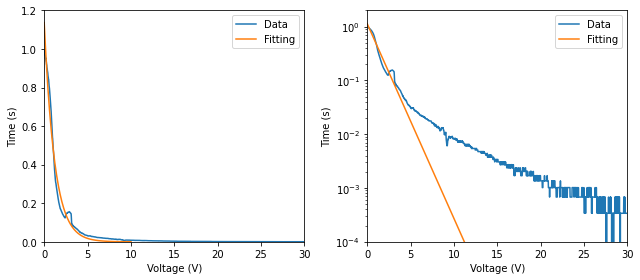

In [6]:
fig = plt.figure(figsize=(9,4),tight_layout=True)
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2) 

df_unf.plot('Time', 'Voltage', ax=ax1, label='Data')
df_unf.plot('Time', 'Voltage', ax=ax2, label='Data')

X1 = np.linspace(0,10)
X2 = np.linspace(0,60)
ax1.plot(X1, f(X1,a,tau), label='Fitting')
ax2.plot(X2, f(X2,a,tau), label='Fitting')

ax1.set_xlim(0,30)
ax2.set_xlim(0,30)
ax1.set_ylim(0,1.2)
ax2.set_ylim(0.0001,2)

ax2.set_yscale('log')

ax1.set_xlabel('Voltage (V)')
ax2.set_xlabel('Voltage (V)')
ax1.set_ylabel('Time (s)')
ax2.set_ylabel('Time (s)')

ax1.legend()
ax2.legend()
plt.show()

C:\Users\shun-\AppData\Local\Temp/ipykernel_1144/1922107270.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unf['Time'] = df_unf['t_unf'] - dT
C:\Users\shun-\AppData\Local\Temp/ipykernel_1144/1922107270.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unf['Voltage'] = df_unf['V_unf'] - dV
C:\Users\shun-\AppData\Local\Temp/ipykernel_1144/1922107270.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

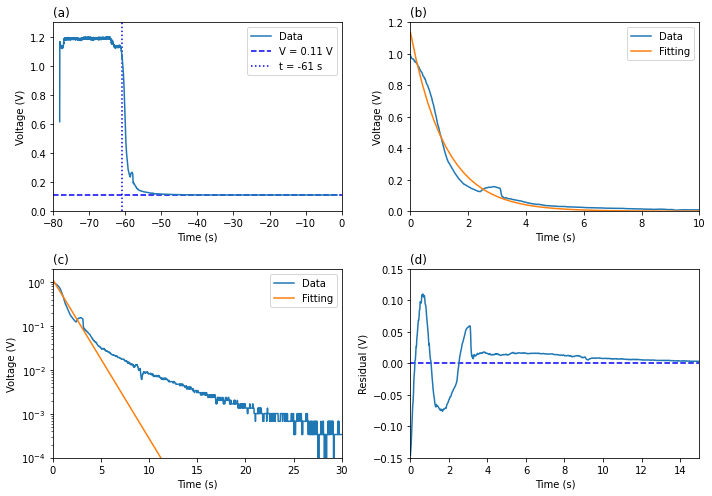

In [7]:
#すべてまとめる
fig = plt.figure(figsize=(10,7),tight_layout=True)
ax0 = plt.subplot(2,2,1)
ax1 = plt.subplot(2,2,2)
ax2 = plt.subplot(2,2,3) 
ax3 = plt.subplot(2,2,4)

#ax0 実験データ
df.plot('t_unf', 'V_unf', ax=ax0, label='Data')
ax0.set_xlim(-80,0)
ax0.set_ylim(0,1.3)
ax0.set_xlabel(r'Time (s)')
ax0.set_ylabel(r'Voltage (V)')
ax0.set_title('(a)',loc='left')

T_min_0 = -61
df_unf = df.query('-61 < t_unf')
dT = df_unf.iloc[0]['t_unf']
dV = df_unf.iloc[-1]['V_unf']
ax0.hlines(dV, -80, 0, linestyle='dashed', color='b', label=r'V = 0.11 V')
ax0.vlines(T_min_0, 0, 1.3, linestyle='dotted', color='b', label=r't = -61 s')
ax0.legend()
df_unf['Time'] = df_unf['t_unf'] - dT
df_unf['Voltage'] = df_unf['V_unf'] - dV

#ax1 ax2 フィッティング
df_unf.plot('Time', 'Voltage', ax=ax1, label='Data')
df_unf.plot('Time', 'Voltage', ax=ax2, label='Data')

X1 = np.linspace(0,10)
X2 = np.linspace(0,60)
ax1.plot(X1, f(X1,a,tau), label='Fitting')
ax2.plot(X2, f(X2,a,tau), label='Fitting')

ax1.set_xlim(0,10)
ax2.set_xlim(0,30)
ax1.set_ylim(0,1.2)
ax2.set_ylim(0.0001,2)

ax2.set_yscale('log')

ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('Voltage (V)')
ax1.set_xlabel('Time (s)')
ax2.set_xlabel('Time (s)')
ax1.set_title('(b)',loc='left')
ax2.set_title('(c)',loc='left')

ax1.legend()
ax2.legend()

#ax3 残差
df_unf['Fitting'] = f(df_unf['Time'],a,tau)
df_unf['Residual'] = df_unf['Voltage'] - df_unf['Fitting']
df_unf.plot('Time', 'Residual',ax=ax3, legend=False)
XMIN = 0
XMAX = 15
ax3.set_xlim(XMIN,XMAX)
ax3.set_ylim(-0.15,0.15)
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('Residual (V)')
ax3.hlines(0,XMIN, XMAX, color='b', linestyle='dashed')

ax3.set_title('(d)',loc='left')

plt.show()

C:\Users\shun-\AppData\Local\Temp/ipykernel_1144/2166726817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unf['Fitting'] = f(df_unf['Time'],a,tau)
C:\Users\shun-\AppData\Local\Temp/ipykernel_1144/2166726817.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unf['Residual'] = df_unf['Voltage'] - df_unf['Fitting']


<Figure size 432x288 with 0 Axes>

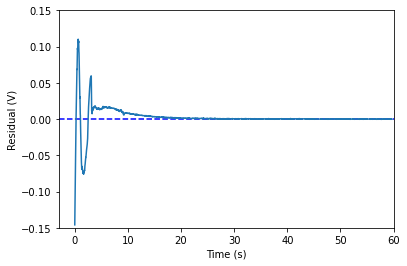

In [8]:
df_unf['Fitting'] = f(df_unf['Time'],a,tau)
df_unf['Residual'] = df_unf['Voltage'] - df_unf['Fitting']
plt.figure()
df_unf.plot('Time', 'Residual', legend=False)
XMIN = -3
XMAX = 60
plt.xlim(XMIN,XMAX)
plt.ylim(-0.15,0.15)
plt.xlabel('Time (s)')
plt.ylabel('Residual (V)')
plt.hlines(0,XMIN, XMAX, color='b', linestyle='dashed')
plt.show()

<Figure size 432x288 with 0 Axes>

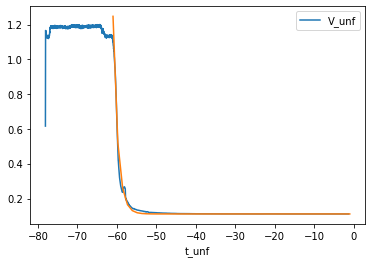

In [9]:
plt.figure()
df.plot('t_unf', 'V_unf')
X = np.linspace(0,60)
plt.plot(X+dT, f(X,a,tau)+dV)
#plt.yscale('log')
plt.show()

1.1206608301859382 0.007034082746976105
0.032721062758303235 0.0064661669689761924
1.1161278489002415 0.013684678087533618
7.599404132582532 1.2491121199817279


C:\Users\shun-\AppData\Local\Temp/ipykernel_1144/1296536941.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unf['Time'] = df_unf['t_unf'] - dT
C:\Users\shun-\AppData\Local\Temp/ipykernel_1144/1296536941.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unf['Voltage'] = df_unf['V_unf'] - dV


<Figure size 432x288 with 0 Axes>

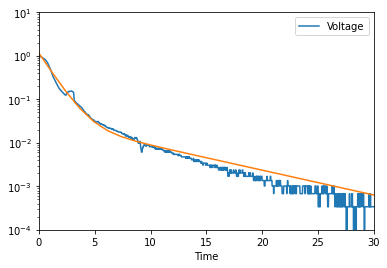

In [10]:
df_unf = df.query('-61 < t_unf < -30')
df_unf['Time'] = df_unf['t_unf'] - dT
df_unf['Voltage'] = df_unf['V_unf'] - dV

g_2 = lambda t, a_1, a_2, tau_1, tau_2: a_1*np.exp(-t/tau_1) + a_2*np.exp(-t/tau_2)
p0 = [1.1,0.1,1.1,5]
popt, pcov = curve_fit(g_2, df_unf['Time'], df_unf['Voltage'],p0=p0)
a_1 = popt[0]
a_2 = popt[1]
tau_1 = popt[2]
tau_2 = popt[3]
da_1 = np.sqrt(pcov[0][0])
da_2 = np.sqrt(pcov[1][1])
dtau_1 = np.sqrt(pcov[2][2])
dtau_2 = np.sqrt(pcov[3][3])
print(a_1, da_1)
print(a_2, da_2)
print(tau_1, dtau_1)
print(tau_2, dtau_2)

plt.figure()
df_unf.plot('Time', 'Voltage')
X = np.linspace(0,60)
plt.plot(X, g_2(X,a_1, a_2, tau_1, tau_2))
plt.xlim(0,30)
#plt.ylim(0,1.2)
plt.ylim(0.0001, 10)
plt.yscale('log')
plt.show()

C:\Users\shun-\AppData\Local\Temp/ipykernel_1144/2394892586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unf['Fitting2'] = g_2(df_unf['Time'],a_1,a_2,tau_1,tau_2)
C:\Users\shun-\AppData\Local\Temp/ipykernel_1144/2394892586.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unf['Residual2'] = df_unf['Voltage'] - df_unf['Fitting2']


<Figure size 432x288 with 0 Axes>

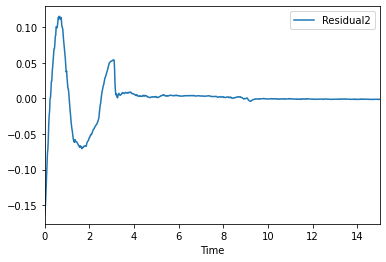

In [11]:
df_unf['Fitting2'] = g_2(df_unf['Time'],a_1,a_2,tau_1,tau_2)
df_unf['Residual2'] = df_unf['Voltage'] - df_unf['Fitting2']
plt.figure()
df_unf.plot('Time', 'Residual2')
plt.xlim(0,15)
plt.show()

In [12]:
#指数っぽい部分だけ抜き出して使う
"""
T_min = -59
df_unf = df.query('-59 < t_unf < -52')
dT = df_unf.iloc[0]['t_unf']
dV = df_unf.iloc[-1]['V_unf']
df_unf['Time'] = df_unf['t_unf'] - dT
df_unf['Voltage'] = df_unf['V_unf'] - dV
#print(df_unf)
plt.figure()
df_unf.plot('Time', 'Voltage')
#plt.yscale('log')
plt.show()
f = lambda t,a,tau: a*np.exp(-t/tau)
popt, pcov = curve_fit(f, df_unf['Time'], df_unf['Voltage'])
a = popt[0]
tau = popt[1]
da = np.sqrt(pcov[0][0])
dtau = np.sqrt(pcov[1][1])
print(a, da)
print(tau, dtau)
plt.figure()
df_unf.plot('Time', 'Voltage')
X = np.linspace(0,10)
plt.plot(X, f(X,a,tau))
plt.yscale('log')
plt.show()
print(dT,dV)
plt.figure()
df.plot('t_unf', 'V_unf')
X = np.linspace(-3.3,70)
plt.plot(X+dT, f(X,a,tau)+dV)
#plt.yscale('log')
plt.show()
"""
#ここまで

"\nT_min = -59\ndf_unf = df.query('-59 < t_unf < -52')\ndT = df_unf.iloc[0]['t_unf']\ndV = df_unf.iloc[-1]['V_unf']\ndf_unf['Time'] = df_unf['t_unf'] - dT\ndf_unf['Voltage'] = df_unf['V_unf'] - dV\n#print(df_unf)\nplt.figure()\ndf_unf.plot('Time', 'Voltage')\n#plt.yscale('log')\nplt.show()\nf = lambda t,a,tau: a*np.exp(-t/tau)\npopt, pcov = curve_fit(f, df_unf['Time'], df_unf['Voltage'])\na = popt[0]\ntau = popt[1]\nda = np.sqrt(pcov[0][0])\ndtau = np.sqrt(pcov[1][1])\nprint(a, da)\nprint(tau, dtau)\nplt.figure()\ndf_unf.plot('Time', 'Voltage')\nX = np.linspace(0,10)\nplt.plot(X, f(X,a,tau))\nplt.yscale('log')\nplt.show()\nprint(dT,dV)\nplt.figure()\ndf.plot('t_unf', 'V_unf')\nX = np.linspace(-3.3,70)\nplt.plot(X+dT, f(X,a,tau)+dV)\n#plt.yscale('log')\nplt.show()\n"

<Figure size 432x288 with 0 Axes>

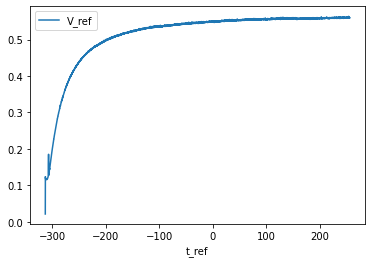

In [13]:
#リフォールディング

plt.figure()
df.plot('t_ref', 'V_ref')
plt.show()

-299.921875 0.559877933


C:\Users\shun-\AppData\Local\Temp/ipykernel_1144/3040807878.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ref['Time'] = df_ref['t_ref'] - dT
C:\Users\shun-\AppData\Local\Temp/ipykernel_1144/3040807878.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ref['Voltage'] = df_ref['V_ref'] - dV


<Figure size 432x288 with 0 Axes>

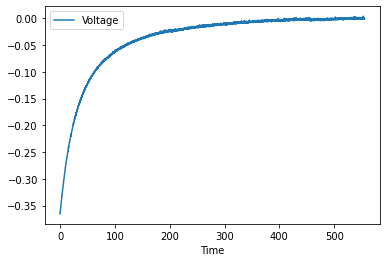

In [14]:
df_ref = df.query('-300 < t_ref ')
dT = df_ref.iloc[0]['t_ref']
dV = df_ref.iloc[-1]['V_ref']
df_ref['Time'] = df_ref['t_ref'] - dT

df_ref['Voltage'] = df_ref['V_ref'] - dV
print(dT,dV)
plt.figure()
df_ref.plot('Time', 'Voltage')
#plt.yscale('log')
plt.show()

In [15]:
g_1 = lambda t,a,tau_1: a*np.exp(-t/tau_1)
popt, pcov = curve_fit(g_1, df_ref['Time'], df_ref['Voltage'])
a = popt[0]
tau_1 = popt[1]
da = np.sqrt(pcov[0][0])
dtau_1 = np.sqrt(pcov[1][1])
print(a, da)
print(tau_1, dtau_1)

-0.31198936697471485 0.0006559067603490892
61.524659035693986 0.1830351753833184


C:\Users\shun-\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 432x288 with 0 Axes>

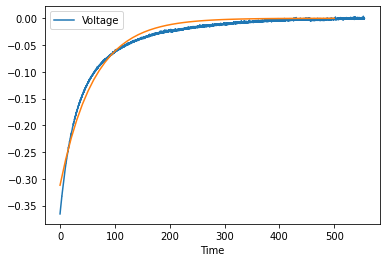

In [16]:
plt.figure()
df_ref.plot('Time', 'Voltage')
X = np.linspace(0,500)
plt.plot(X, g_1(X,a,tau_1))
#plt.yscale('log')
plt.show()

C:\Users\shun-\AppData\Local\Temp/ipykernel_1144/1764713699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ref['Fitting'] = g_1(df_ref['Time'], a, tau_1)
C:\Users\shun-\AppData\Local\Temp/ipykernel_1144/1764713699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ref['Residual'] = df_ref['Voltage'] - df_ref['Fitting']


<Figure size 432x288 with 0 Axes>

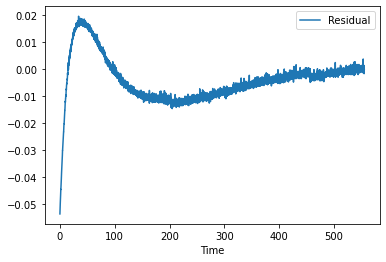

In [17]:
df_ref['Fitting'] = g_1(df_ref['Time'], a, tau_1)
df_ref['Residual'] = df_ref['Voltage'] - df_ref['Fitting']
plt.figure()
df_ref.plot('Time', 'Residual')
plt.show()

## memo
g_1 fit:
a = -0.31198 \pm 0.00065 \n
tau = 61.52 \pm 0.18

-0.14052369804343617 0.0002993059644030848
-0.22179224109327647 0.0002764902900895453
113.34474789549952 0.15821812901418147
25.434769499480172 0.047172859069920796


<Figure size 432x288 with 0 Axes>

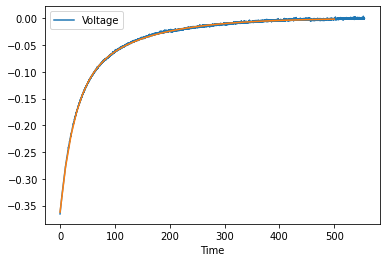

In [18]:
g_2 = lambda t, a_1, a_2, tau_1, tau_2: a_1*np.exp(-t/tau_1) + a_2*np.exp(-t/tau_2)
p0 = [-0.1,-0.1,60,10]
popt, pcov = curve_fit(g_2, df_ref['Time'], df_ref['Voltage'],p0=p0)
a_1 = popt[0]
a_2 = popt[1]
tau_1 = popt[2]
tau_2 = popt[3]
da_1 = np.sqrt(pcov[0][0])
da_2 = np.sqrt(pcov[1][1])
dtau_1 = np.sqrt(pcov[2][2])
dtau_2 = np.sqrt(pcov[3][3])
print(a_1, da_1)
print(a_2, da_2)
print(tau_1, dtau_1)
print(tau_2, dtau_2)

plt.figure()
df_ref.plot('Time', 'Voltage')
X = np.linspace(0,500)
plt.plot(X, g_2(X,a_1, a_2, tau_1, tau_2))
#plt.yscale('log')
plt.show()

C:\Users\shun-\AppData\Local\Temp/ipykernel_1144/59074101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ref['Fitting_2'] = g_2(df_ref['Time'], a_1, a_2, tau_1, tau_2)
C:\Users\shun-\AppData\Local\Temp/ipykernel_1144/59074101.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ref['Residual_2'] = df_ref['Voltage'] - df_ref['Fitting_2']


<Figure size 432x288 with 0 Axes>

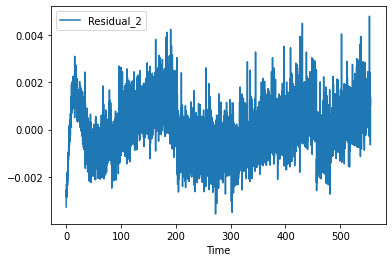

In [19]:
df_ref['Fitting_2'] = g_2(df_ref['Time'], a_1, a_2, tau_1, tau_2)
df_ref['Residual_2'] = df_ref['Voltage'] - df_ref['Fitting_2']
plt.figure()
df_ref.plot('Time', 'Residual_2')
plt.show()

-0.12833985954724653 0.0006236465616641893
-0.19645209497837163 0.0028725240456004253
-0.041552880977619285 0.0032576587371822897
118.34507561765096 0.2797504752156045
30.247130827320994 0.32388811387388416
11.983596663171971 0.5027541974860055


<Figure size 432x288 with 0 Axes>

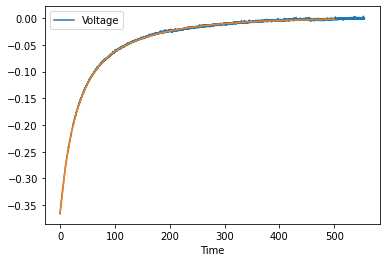

In [20]:
g_3 = lambda t, a_1, a_2, a_3, tau_1, tau_2, tau_3: a_1*np.exp(-t/tau_1) + a_2*np.exp(-t/tau_2) + a_3*np.exp(-t/tau_3)
p1 = [-0.1,-0.1, 1, 100,20, 1]
popt, pcov = curve_fit(g_3, df_ref['Time'], df_ref['Voltage'],p0=p1)
a_1 = popt[0]
a_2 = popt[1]
a_3 = popt[2]
tau_1 = popt[3]
tau_2 = popt[4]
tau_3 = popt[5]
da_1 = np.sqrt(pcov[0][0])
da_2 = np.sqrt(pcov[1][1])
da_3 = np.sqrt(pcov[2][2])
dtau_1 = np.sqrt(pcov[3][3])
dtau_2 = np.sqrt(pcov[4][4])
dtau_3 = np.sqrt(pcov[5][5])
print(a_1, da_1)
print(a_2, da_2)
print(a_3, da_3)
print(tau_1, dtau_1)
print(tau_2, dtau_2)
print(tau_3, dtau_3)

plt.figure()
df_ref.plot('Time', 'Voltage')
X = np.linspace(0,500)
plt.plot(X, g_3(X,a_1, a_2, a_3, tau_1, tau_2, tau_3))
#plt.yscale('log')
plt.show()

C:\Users\shun-\AppData\Local\Temp/ipykernel_1144/3495162572.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ref['Fitting_3'] = g_3(df_ref['Time'], a_1, a_2, a_3, tau_1, tau_2, tau_3)
C:\Users\shun-\AppData\Local\Temp/ipykernel_1144/3495162572.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ref['Residual_3'] = df_ref['Voltage'] - df_ref['Fitting_3']


<Figure size 432x288 with 0 Axes>

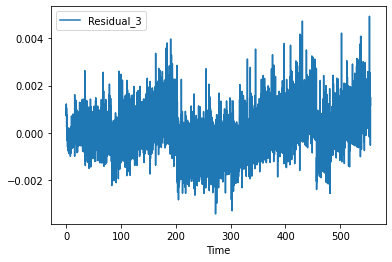

In [21]:
df_ref['Fitting_3'] = g_3(df_ref['Time'], a_1, a_2, a_3, tau_1, tau_2, tau_3)
df_ref['Residual_3'] = df_ref['Voltage'] - df_ref['Fitting_3']
plt.figure()
df_ref.plot('Time', 'Residual_3')
plt.show()

In [22]:
df_ref.head()

,t_ref,V_ref,t_unf,V_unf,Time,Voltage,Fitting,Residual,Fitting_2,Residual_2,Fitting_3,Residual_3
161,-299.921875,0.194283,-74.980469,1.180507,0.000000,-0.365594,-0.311989,-0.053605,-0.362316,-0.003279,-0.366345,0.000750
162,-299.843750,0.195301,-74.960938,1.185594,0.078125,-0.364577,-0.311593,-0.052984,-0.361539,-0.003038,-0.365483,0.000906
163,-299.765625,0.196318,-74.941406,1.190681,0.156250,-0.363560,-0.311198,-0.052362,-0.360764,-0.002796,-0.364625,0.001065
164,-299.687500,0.197336,-74.921875,1.183898,0.234375,-0.362542,-0.310803,-0.051739,-0.359991,-0.002551,-0.363770,0.001228
165,-299.609375,0.198014,-74.902344,1.185255,0.312500,-0.361864,-0.310409,-0.051455,-0.359221,-0.002643,-0.362918,0.001054


C:\Users\shun-\AppData\Local\Temp/ipykernel_1144/3636081117.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ref['absVoltage'] = np.abs(df_ref['Voltage'])
C:\Users\shun-\AppData\Local\Temp/ipykernel_1144/3636081117.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ref['absFitting_1'] = np.abs(df_ref['Fitting'])
C:\Users\shun-\AppData\Local\Temp/ipykernel_1144/3636081117.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

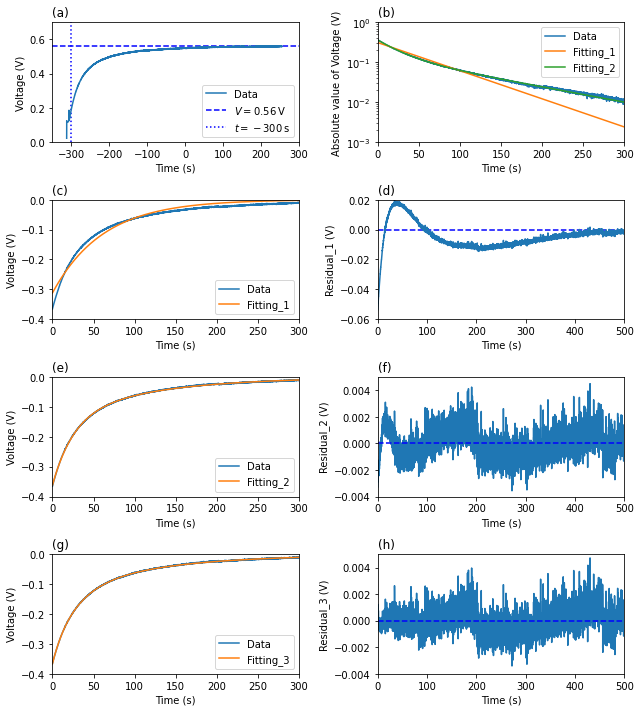

In [23]:
fig, axes = plt.subplots(4,2,tight_layout=True,figsize=(9,10))
df.plot('t_ref', 'V_ref', ax=axes[0,0], label=r'Data')
axes[0,0].hlines(0.56,-350,300, linestyle='dashed', color='b', label=r'$V = 0.56\,$V')
axes[0,0].vlines(-300,0,1, linestyle='dotted', color='b', label=r'$t = -300\,$s')
axes[0,0].set_xlim(-350,300)
axes[0,0].set_ylim(0,0.7)
axes[0,0].set_title(r'(a)', loc='left')
axes[0,0].set_xlabel(r'Time (s)')
axes[0,0].set_ylabel(r'Voltage (V)')
axes[0,0].legend()

df_ref['absVoltage'] = np.abs(df_ref['Voltage'])
df_ref['absFitting_1'] = np.abs(df_ref['Fitting'])
df_ref['absFitting_2'] = np.abs(df_ref['Fitting_2'])
df_ref['absFitting_3'] = np.abs(df_ref['Fitting_3'])

df_ref.plot('Time','absVoltage', ax=axes[0,1], label=r'Data')
df_ref.plot('Time', 'absFitting_1', ax=axes[0,1], label=r'Fitting_1')
df_ref.plot('Time', 'absFitting_2', ax=axes[0,1], label=r'Fitting_2')
#df_ref.plot('Time', 'absFitting_3', ax=axes[0,1], label=r'Fitting_3')
axes[0,1].set_yscale('log')
axes[0,1].set_xlim(0,300)
axes[0,1].set_ylim(0.001,1)
axes[0,1].set_title(r'(b)', loc='left')
axes[0,1].set_xlabel(r'Time (s)')
axes[0,1].set_ylabel(r'Absolute value of Voltage (V)')
axes[0,1].legend()

df_ref.plot('Time', 'Voltage', ax=axes[1,0], label=r'Data')
df_ref.plot('Time', 'Fitting', ax=axes[1,0], label=r'Fitting_1')
axes[1,0].set_xlim(0,300)
axes[1,0].set_ylim(-0.4,0)
axes[1,0].set_title(r'(c)', loc='left')
axes[1,0].set_xlabel(r'Time (s)')
axes[1,0].set_ylabel(r'Voltage (V)')
axes[1,0].legend()

df_ref.plot('Time', 'Voltage', ax=axes[2,0], label=r'Data')
df_ref.plot('Time', 'Fitting_2', ax=axes[2,0], label=r'Fitting_2')
axes[2,0].set_xlim(0,300)
axes[2,0].set_ylim(-0.4,0)
axes[2,0].set_title(r'(e)', loc='left')
axes[2,0].set_xlabel(r'Time (s)')
axes[2,0].set_ylabel(r'Voltage (V)')
axes[2,0].legend()

df_ref.plot('Time', 'Voltage', ax=axes[3,0], label=r'Data')
df_ref.plot('Time', 'Fitting_3', ax=axes[3,0], label=r'Fitting_3')
axes[3,0].set_xlim(0,300)
axes[3,0].set_ylim(-0.4,0)
axes[3,0].set_title(r'(g)', loc='left')
axes[3,0].set_xlabel(r'Time (s)')
axes[3,0].set_ylabel(r'Voltage (V)')
axes[3,0].legend()


df_ref.plot('Time', 'Residual', ax=axes[1,1], legend=False)
axes[1,1].hlines(0,0,600, linestyle='dashed', color='b')
axes[1,1].set_xlim(0,500)
axes[1,1].set_ylim(-0.06,0.02)
axes[1,1].set_title(r'(d)', loc='left')
axes[1,1].set_xlabel(r'Time (s)')
axes[1,1].set_ylabel(r'Residual_1 (V)')

df_ref.plot('Time', 'Residual_2', ax=axes[2,1],legend=False, zorder=1)
axes[2,1].hlines(0,0,600, linestyle='dashed', color='b', zorder=2)
axes[2,1].set_xlim(0,500)
axes[2,1].set_ylim(-0.004,0.005)
axes[2,1].set_title(r'(f)', loc='left')
axes[2,1].set_xlabel(r'Time (s)')
axes[2,1].set_ylabel(r'Residual_2 (V)')

df_ref.plot('Time', 'Residual_3', ax=axes[3,1],legend=False, zorder=1)
axes[3,1].hlines(0,0,600, linestyle='dashed', color='b', zorder=2)
axes[3,1].set_xlim(0,500)
axes[3,1].set_ylim(-0.004,0.005)
axes[3,1].set_title(r'(h)', loc='left')
axes[3,1].set_xlabel(r'Time (s)')
axes[3,1].set_ylabel(r'Residual_3 (V)')

plt.show()

<Figure size 432x288 with 0 Axes>

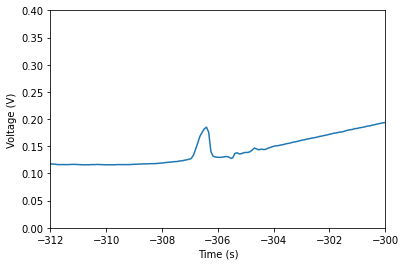

In [24]:
plt.figure()
df.plot('t_ref', 'V_ref', legend=False)
plt.xlim(-312,-300)
plt.ylim(0,0.4)

plt.xlabel(r'Time (s)')
plt.ylabel(r'Voltage (V)')
plt.show()

<Figure size 432x288 with 0 Axes>

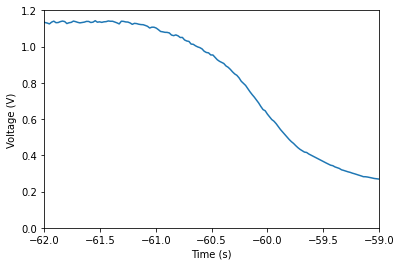

In [25]:
plt.figure()
df.plot('t_unf', 'V_unf', legend=False)
plt.xlim(-62,-59)
plt.ylim(0,1.2)

plt.xlabel(r'Time (s)')
plt.ylabel(r'Voltage (V)')
plt.show()

In [26]:
df.query('-312 < t_ref < -308').describe()

,t_ref,V_ref,t_unf,V_unf
count,51.000000,51.000000,51.000000,51.000000
mean,-310.000000,0.116680,-77.500000,1.136498
std,1.161412,0.000775,0.290353,0.009295
min,-311.953125,0.115942,-77.988281,1.120140
25%,-310.976562,0.116281,-77.744141,1.129975
50%,-310.000000,0.116281,-77.500000,1.134383
75%,-309.023438,0.117129,-77.255859,1.139640
max,-308.046875,0.118994,-77.011719,1.161515


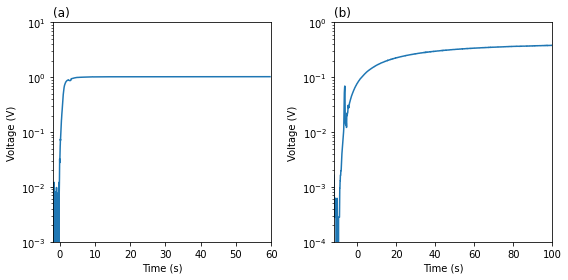

In [40]:
#mean voltage unf:1.13, ref:0.116

df['V_unf_s'] = 1.135 - df['V_unf'] 
df['V_ref_s'] = df['V_ref'] - 0.116
df['Time_unf'] = df['t_unf'] + 61
df['Time_ref'] = df['t_ref'] + 300

fig = plt.figure(figsize=(8,4), tight_layout=True)
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

df.plot('Time_unf', 'V_unf_s', legend=False, ax=ax1)
#ax1.hlines(1.13, -62, -59)
#ax1.set_xlim(-62,-58)
#ax1.set_xlim(-2,2) #直後確認
ax1.set_xlim(-2,60) #全体確認
#ax1.set_ylim(0,1.2)
#ax1.set_ylim(0.001,1) #直後確認
ax1.set_ylim(0.001,10) #全体確認
ax1.set_title(r'(a)', loc='left')
ax1.set_xlabel(r'Time (s)')
ax1.set_ylabel(r'Voltage (V)')
ax1.set_yscale('log')

df.plot('Time_ref', 'V_ref_s', legend=False, ax=ax2)
#ax2.hlines(0.116, -312, -300)
#ax2.set_xlim(-312,-290)
#ax2.set_xlim(-12,-4) #直後確認
ax2.set_xlim(-12,100) #全体確認
#ax2.set_ylim(0,0.4)
#ax2.set_ylim(0.0001,0.1) #直後確認
ax2.set_ylim(0.0001,1) #全体確認
ax2.set_title(r'(b)', loc='left')
ax2.set_xlabel(r'Time (s)')
ax2.set_ylabel(r'Voltage (V)')
ax2.set_yscale('log')

plt.show()

-0.1289608100411505 0.0006370450863377124
-0.20622109393348195 0.0033304669131964232
-0.3315210487554689 58.82072168187698
0.301519189586233 58.823914790025064
118.13657858656862 0.2822644131910402
29.53595426110264 0.3422825817187356
6.767380048227081 30.484045227968114
6.441003087203796 30.85417510407097


<Figure size 432x288 with 0 Axes>

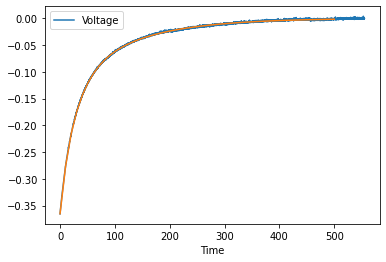

In [31]:
g_4 = lambda t, a_1, a_2, a_3, a_4, tau_1, tau_2, tau_3, tau_4: a_1*np.exp(-t/tau_1) + a_2*np.exp(-t/tau_2) + a_3*np.exp(-t/tau_3) + a_4*np.exp(-t/tau_4)
p1 = [-0.1,-0.1, -0.1, -0.1, 200, 100, 10, 0.1]
popt, pcov = curve_fit(g_4, df_ref['Time'], df_ref['Voltage'],p0=p1)
a_1 = popt[0]
a_2 = popt[1]
a_3 = popt[2]
a_4 = popt[3]
tau_1 = popt[4]
tau_2 = popt[5]
tau_3 = popt[6]
tau_4 = popt[7]
da_1 = np.sqrt(pcov[0][0])
da_2 = np.sqrt(pcov[1][1])
da_3 = np.sqrt(pcov[2][2])
da_4 = np.sqrt(pcov[3][3])
dtau_1 = np.sqrt(pcov[4][4])
dtau_2 = np.sqrt(pcov[5][5])
dtau_3 = np.sqrt(pcov[6][6])
dtau_4 = np.sqrt(pcov[7][7])
print(a_1, da_1)
print(a_2, da_2)
print(a_3, da_3)
print(a_4, da_4)
print(tau_1, dtau_1)
print(tau_2, dtau_2)
print(tau_3, dtau_3)
print(tau_4, dtau_4)

plt.figure()
df_ref.plot('Time', 'Voltage')
X = np.linspace(0,500)
plt.plot(X, g_4(X,a_1, a_2, a_3, a_4, tau_1, tau_2, tau_3, tau_4))
#plt.yscale('log')
plt.show()

In [29]:
pcov

array([[ 7.17381684e-07,  7.38203890e-06, -1.37813740e-02,
         1.37732397e-02,  2.86982504e-04,  5.72261890e-04,
         6.75817792e+00, -6.75356588e+00],
       [ 7.38203670e-06,  1.22989969e-04, -2.78948631e-01,
         2.78817371e-01,  2.66570026e-03,  8.16391469e-03,
         1.26324422e+02, -1.26244417e+02],
       [-1.37560575e-02, -2.78475445e-01,  2.45718143e+05,
        -2.45717841e+05, -4.75392866e+00, -1.75047774e+01,
        -3.11472876e+05,  3.23400596e+05],
       [ 1.37479232e-02,  2.78344186e-01, -2.45717840e+05,
         2.45717538e+05,  4.75096390e+00,  1.74959906e+01,
         3.11338542e+05, -3.23266347e+05],
       [ 2.86982520e-04,  2.66570137e-03, -4.76297959e+00,
         4.76001484e+00,  1.20241711e-01,  2.13204070e-01,
         2.41598943e+03, -2.41432001e+03],
       [ 5.72261771e-04,  8.16391509e-03, -1.75348699e+01,
         1.75260831e+01,  2.13204008e-01,  5.68957141e-01,
         8.03376278e+03, -8.02855104e+03],
       [ 6.75817499e+00,  1.263244

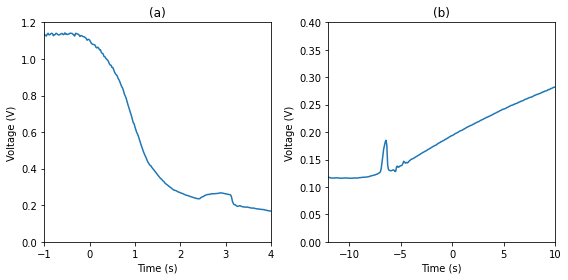

In [45]:
fig = plt.figure(figsize=(8,4), tight_layout=True)
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

df.plot('Time_unf', 'V_unf', legend=False, ax=ax1)
#ax2.set_xlim(-62,-50)
ax1.set_xlim(-1,4)
ax1.set_ylim(0,1.2)
ax1.set_title(r'(a)')
ax1.set_xlabel(r'Time (s)')
ax1.set_ylabel(r'Voltage (V)')

df.plot('Time_ref', 'V_ref', legend=False, ax=ax2)
#ax2.set_xlim(-312,-300)
ax2.set_xlim(-12,10)
ax2.set_ylim(0,0.4)
ax2.set_title(r'(b)')
ax2.set_xlabel(r'Time (s)')
ax2.set_ylabel(r'Voltage (V)')

plt.show()